In [101]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
import numpy as np

In [34]:
import sys 
sys.path.append(r"C:\Users\kirill_ionkin\Desktop\proga\Data_Science_and_same\YOLO")

In [35]:
import numpy as np

In [90]:
from code_helper import metrics, metrics_torch

In [37]:
bbox_pred = np.array([
    [1, 1, 4, 5],
    [1, 1, 4, 5]
])

ground_truth = np.array([
    [3, 4, 5, 6],
    [4, 5, 5, 6]
])

In [40]:
metrics.intersection(ground_truth=ground_truth, pred_bbox=bbox_pred)

array([[1],
       [0]])

In [48]:
metrics.union(ground_truth=ground_truth, pred_bbox=bbox_pred)

array([[15],
       [13]])

In [49]:
metrics.IoU(ground_truth=ground_truth, pred_bbox=bbox_pred)

array([[0.06666667],
       [0.        ]])

In [51]:
import torch

In [85]:
ground_truth_torch = torch.from_numpy(ground_truth)
ground_truth_torch

tensor([[3, 4, 5, 6],
        [4, 5, 5, 6]], dtype=torch.int32)

In [84]:
bbox_pred_torch = torch.from_numpy(bbox_pred)
bbox_pred_torch

tensor([[1, 1, 4, 5],
        [1, 1, 4, 5]], dtype=torch.int32)

In [86]:
type(bbox_pred_torch)

torch.Tensor

In [93]:
a = ground_truth_torch[:, 0:1]
a

tensor([[3],
        [4]], dtype=torch.int32)

In [97]:
b = bbox_pred_torch[:, 0:1]
b

tensor([[1],
        [1]], dtype=torch.int32)

In [91]:
metrics_torch.get_coordinates(bbox_pred_torch)

(tensor([[1],
         [1]], dtype=torch.int32),
 tensor([[1],
         [1]], dtype=torch.int32),
 tensor([[4],
         [4]], dtype=torch.int32),
 tensor([[5],
         [5]], dtype=torch.int32))

In [100]:
torch.max(a, b)

tensor([[3],
        [4]], dtype=torch.int32)

In [102]:
metrics_torch.intersection(ground_truth=ground_truth_torch, pred_bbox=bbox_pred_torch)

tensor([[1],
        [0]], dtype=torch.int32)

In [103]:
metrics_torch.union(ground_truth=ground_truth_torch, pred_bbox=bbox_pred_torch)

tensor([[15],
        [13]], dtype=torch.int32)

In [104]:
metrics_torch.IoU(ground_truth=ground_truth_torch, pred_bbox=bbox_pred_torch)

tensor([[0.0667],
        [0.0000]])

# NMS(Non Maximum Suppression)

In [486]:
img_path = "data/dog_bike_car.jpg"

In [487]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl
import seaborn as sns

from PIL import Image

%matplotlib inline

In [488]:
calsses = {
    1: "dog",
    2: "car"
}

settings = {
    1: "red",
    2: "yellow"
}

In [489]:
bbox1 = [130, 200, 200, 350, 0.9, 1]
bbox2 = [140, 210, 250, 400, 0.7, 1]

bbox3 = [460, 75, 220, 100, 0.99, 2]
bbox4 = [450, 100, 200, 110, 0.7, 2]
bbox5 = [500, 400, 100, 110, 0.2, 2]


boxes = np.array([bbox1, bbox2, bbox3, bbox4, bbox5])

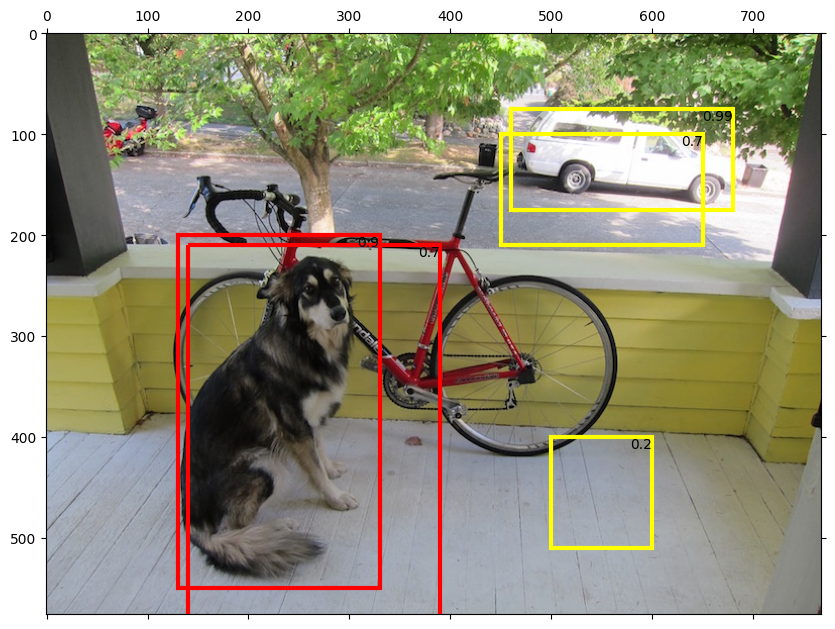

In [490]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches((10, 10))

img = mpl.image.imread(img_path)
ax.imshow(img)

for box in boxes:
    x1, y1, width, height, confidence, class_obj = box
    color = settings[class_obj]
    
    rect_i = patches.Rectangle((x1, y1), width, height, linewidth=3, edgecolor=color, facecolor='none')
    ax.add_patch(rect_i)
    ax.annotate(f"{confidence}", xy=(x1+width, y1), color="black", ha='right', va='top')
    
ax.tick_params(bottom=True, top=True, left=True, right=True)
ax.tick_params(labelbottom=False, labeltop=True, labelleft=True, labelright=False)

In [494]:
from code_helper import utils

In [496]:
boxes_np_x1y1wh = boxes

In [501]:
boxes_np_x1y1x2y2 = utils.convert_x1y1wh_to_x1y1x2y2(boxes_np_x1y1wh)
boxes_np_x1y1x2y2

array([[1.30e+02, 2.00e+02, 3.30e+02, 5.50e+02, 9.00e-01, 1.00e+00],
       [1.40e+02, 2.10e+02, 3.90e+02, 6.10e+02, 7.00e-01, 1.00e+00],
       [4.60e+02, 7.50e+01, 6.80e+02, 1.75e+02, 9.90e-01, 2.00e+00],
       [4.50e+02, 1.00e+02, 6.50e+02, 2.10e+02, 7.00e-01, 2.00e+00],
       [5.00e+02, 4.00e+02, 6.00e+02, 5.10e+02, 2.00e-01, 2.00e+00]])

In [499]:
# Применим адгоритм nms

In [500]:
boxes_np_x1y1x2y2_after_nms = nms(bboxes=boxes_np_x1y1x2y2, iou_threshold=0.4)
boxes_np_x1y1x2y2_after_nms

array([[460.  ,  75.  , 680.  , 175.  ,   0.99,   2.  ],
       [130.  , 200.  , 330.  , 550.  ,   0.9 ,   1.  ]])

In [502]:
boxes_np_x1y1wh_after_nms = convert_x1y1x2y2_to_x1y1wh(boxes_np_x1y1x2y2_after_nms)
boxes_np_x1y1wh_after_nms

array([[460.  ,  75.  , 220.  , 100.  ,   0.99,   2.  ],
       [130.  , 200.  , 200.  , 350.  ,   0.9 ,   1.  ]])

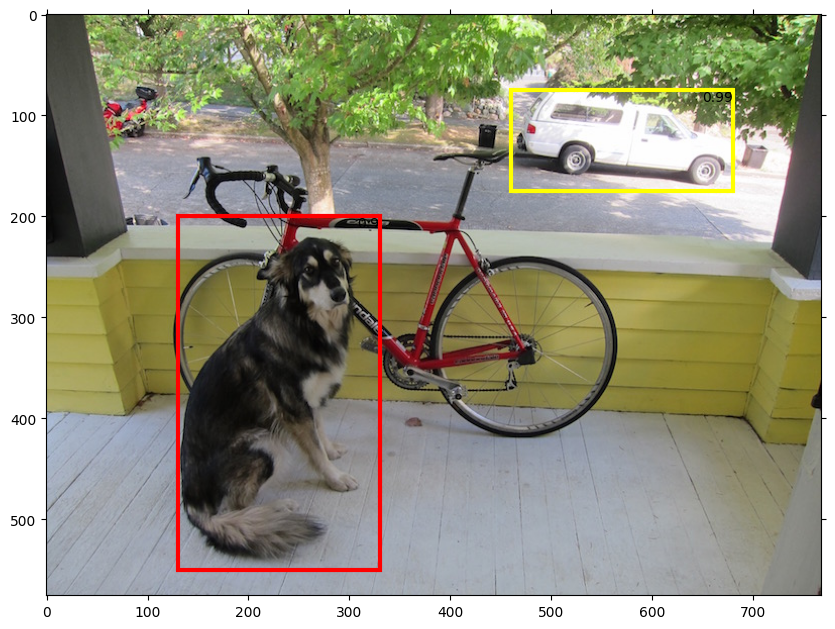

In [503]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches((10, 10))

img = mpl.image.imread(img_path)
ax.imshow(img)

for box in boxes_np_x1y1wh_after_nms:
    x1, y1, width, height, confidence, class_obj = box
    color = settings[class_obj]
    
    rect_i = patches.Rectangle((x1, y1), width, height, linewidth=3, edgecolor=color, facecolor='none')
    ax.add_patch(rect_i)
    ax.annotate(f"{confidence}", xy=(x1+width, y1), color="black", ha='right', va='top')
    
ax.tick_params(bottom=True, top=True, left=True, right=True)